In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('AB_NYC_2019.csv')

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
data.shape

(48895, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Task 1: List top ten host_id with the most values counts

In [7]:
host = data['host_id'].value_counts()[:10]
host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

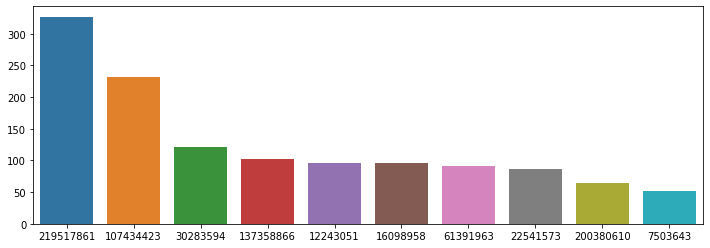

In [8]:
plt.figure(figsize = (12,4))
sns.barplot(x = host.index, y = host.values, order = host.index)
plt.show()

#### Task 2: what is the mean price and avg price of each neighbourhood_group of a room?

In [32]:
nei_grp = [i for i in data['neighbourhood_group'].unique()]
nei_grp

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [60]:
mean_price = data['price'].mean()
mean_price

152.7206871868289

In [48]:
nei_mean = []
for i in nei_grp:
    nei_mean.append(data[data['neighbourhood_group'] == i]['price'].mean())

nei_mean

[124.38320732192598,
 196.8758136743456,
 99.51764913519237,
 114.81233243967829,
 87.4967919340055]

In [61]:
nei_avprice = pd.DataFrame({'neighbour_group':nei_grp,
             'avg_price': nei_mean,
                           'mean_price': mean_price})
nei_avprice

,neighbour_group,avg_price,mean_price
0,Brooklyn,124.383207,152.720687
1,Manhattan,196.875814,152.720687
2,Queens,99.517649,152.720687
3,Staten Island,114.812332,152.720687
4,Bronx,87.496792,152.720687


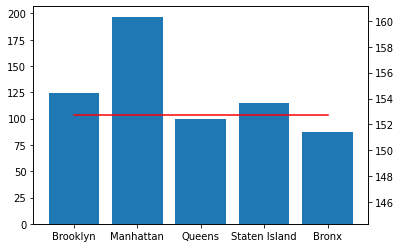

In [65]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(x = 'neighbour_group', height = 'avg_price', data = nei_avprice)
ax2.plot('neighbour_group', 'mean_price', data = nei_avprice, color = 'r')
plt.show()

#### Task 3: Distribution of neighbourhood_group

In [68]:
data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

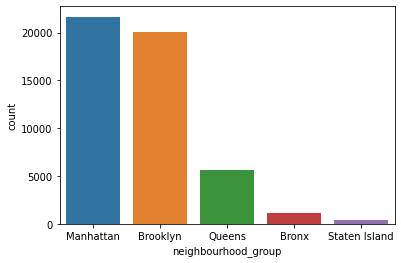

In [66]:
sns.countplot(x = 'neighbourhood_group', data = data, order = data['neighbourhood_group'].value_counts().index)
plt.show()

#### Task4: Distribution of neighbourhood of each neighbourhood_group

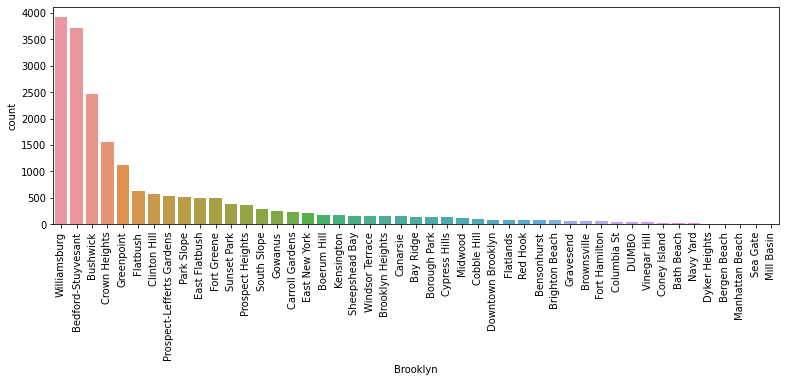

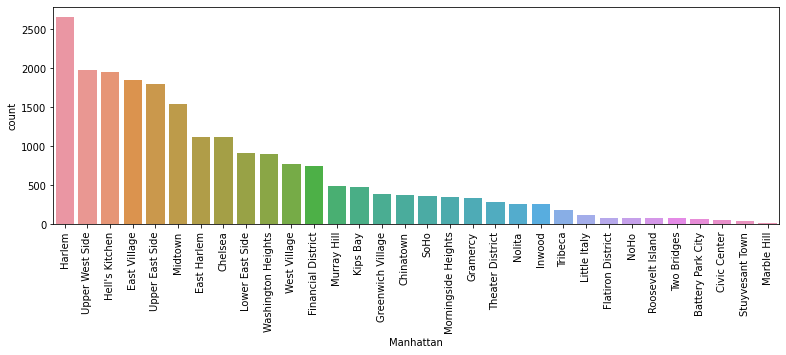

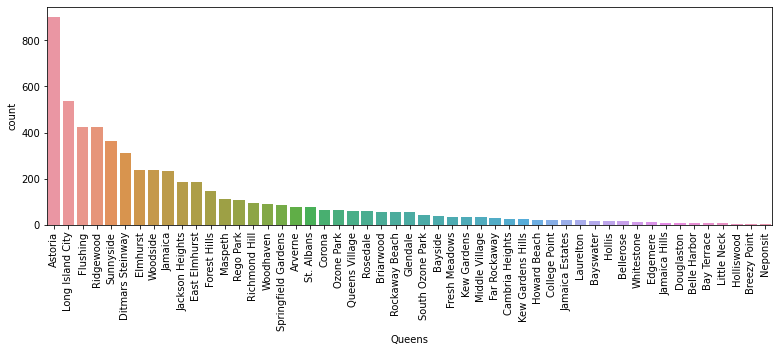

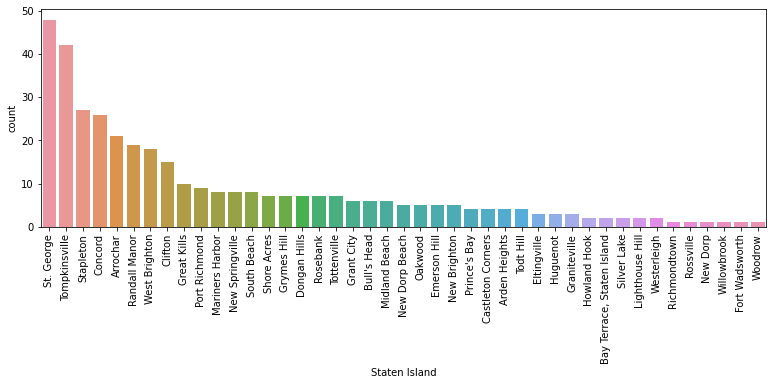

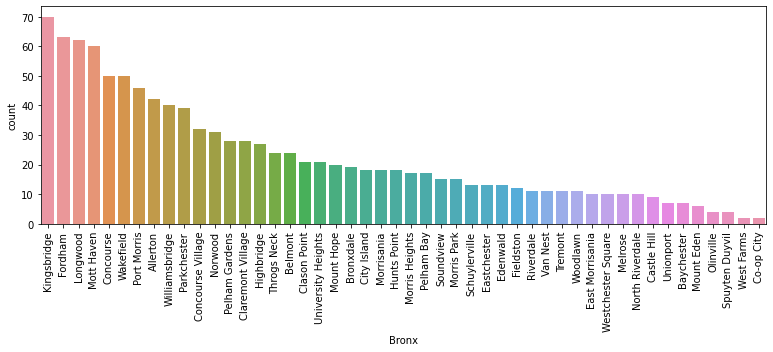

In [11]:
for i in nei_grp:
    plt.figure(figsize = (13,4))
    sns.countplot(x = 'neighbourhood', data = data[data['neighbourhood_group'] == i], order = data[data['neighbourhood_group'] == i].neighbourhood.value_counts().index)
    plt.xticks(rotation = 90)
    plt.xlabel(i)
    plt.show()

#### Task5: Distribution of room types

In [67]:
data['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

<AxesSubplot:xlabel='room_type', ylabel='count'>

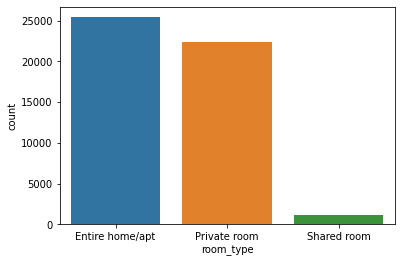

In [12]:
sns.countplot(x = 'room_type', data = data, order = data['room_type'].value_counts().index)

#### Task6: Check availablity of rooms -  howmany rooms have low availability and howmany have high availability.

In [13]:
data['availability_365'].value_counts()

0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
196       24
183       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

In [14]:
av_df = data[data['availability_365'] == 0]
av_0 = av_df['availability_365'].value_counts().reset_index()
av_0

,index,availability_365
0,0,17533


In [15]:
bins = [0,15,45,90,180,365]
av_bins = pd.cut(data['availability_365'], bins = bins).value_counts().reset_index()
av_bins

,index,availability_365
0,"(180, 365]",14364
1,"(90, 180]",5285
2,"(45, 90]",4743
3,"(15, 45]",3519
4,"(0, 15]",3451


In [16]:
av = av_0.append(av_bins, ignore_index= True)

In [17]:
av

,index,availability_365
0,0,17533
1,"(180, 365]",14364
2,"(90, 180]",5285
3,"(45, 90]",4743
4,"(15, 45]",3519
5,"(0, 15]",3451


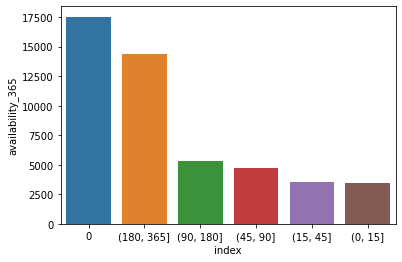

In [111]:
sns.barplot(x = 'index', y = 'availability_365', data = av)
plt.show()

#### Task7: check howmany rooms have low availability in each neighbourhood_group and neighbourhood.

In [20]:
av_df.groupby('neighbourhood_group').count()['id'].sort_values(ascending = False)

neighbourhood_group
Manhattan        8102
Brooklyn         7844
Queens           1368
Bronx             177
Staten Island      42
Name: id, dtype: int64

In [21]:
values =av_df.groupby(['neighbourhood_group', 'neighbourhood']).count()['id'].reset_index().sort_values(by = 'id', ascending = False)
values.head()

,neighbourhood_group,neighbourhood,id
81,Brooklyn,Williamsburg,1868
40,Brooklyn,Bedford-Stuyvesant,1232
47,Brooklyn,Bushwick,1016
93,Manhattan,Harlem,924
88,Manhattan,East Village,896


#### Task8: Room which have highest number_of_reviews and highest reviews_per_month.

In [75]:
data[data['number_of_reviews'] == data['number_of_reviews'].max()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.6673,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333


In [78]:
data[data['reviews_per_month'] == data['reviews_per_month'].max()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.5,9,299


#### Task9: plot NYC map based on neighbourhood_group, room_type and availability

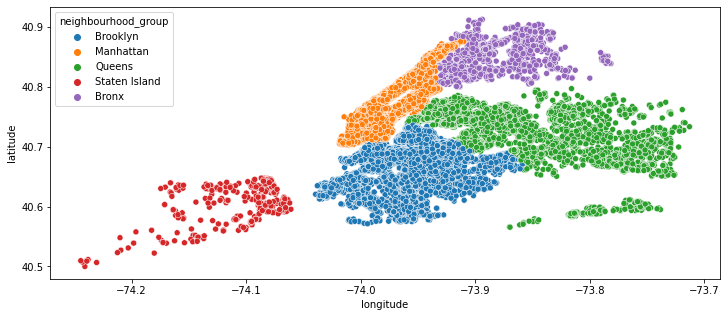

In [23]:
plt.figure(figsize = (12,5))
sns.scatterplot(x = data['longitude'], y = data['latitude'], hue = data['neighbourhood_group'])
plt.show()

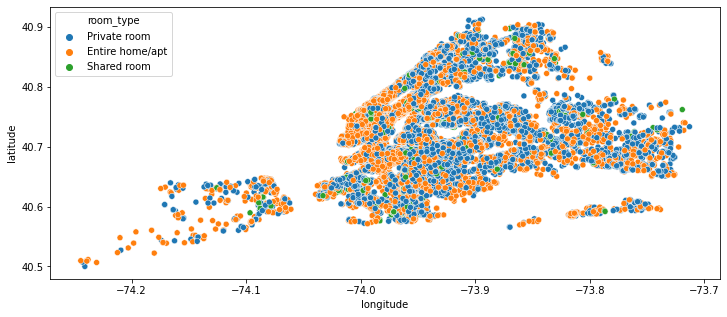

In [92]:
plt.figure(figsize = (12,5))
sns.scatterplot(x = data['longitude'], y = data['latitude'], hue = data['room_type'])
plt.show()

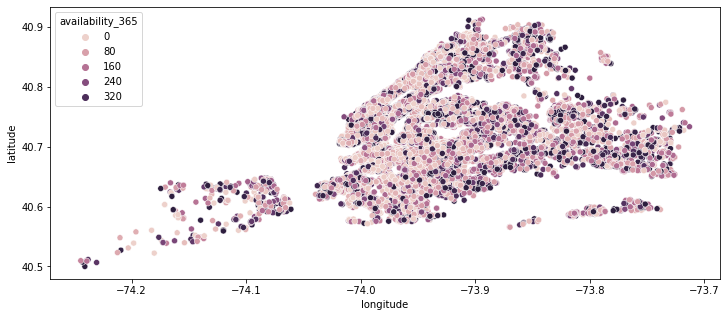

In [93]:
plt.figure(figsize = (12,5))
sns.scatterplot(x = data['longitude'], y = data['latitude'], hue = data['availability_365'])
plt.show()